In [1]:
from source.util import utils as u
from source import metrics, plots
from source import handshake2, scargc, hs
import sys
import time
import os
import psutil
import resource

In [2]:
poolsize = 150
clusters = 2
n_components = 2
epsilon = 0.05
percent = 10

In [3]:
base = '/home/localuser/Documentos/procopio/tcc/datasets/1CHT.txt'
dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_features = u.criar_datasets(5, base)


Handshake

In [4]:
start = time.time()

predicted, updt = handshake2.handshake2(dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_components, n_features, epsilon, percent)

end = time.time()
mem = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
tempo = end - start

SCARGC

In [5]:
startScargc = time.time()

predictedS, updtS = scargc.scargc_1NN(dataset, data_labeled, dataset_train, l_train, stream, l_stream, poolsize, clusters, n_features)

endScargc = time.time()
memS = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
tempoS = endScargc - startScargc

800


/home/localuser/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [6]:
# acc_percent = metrics.makeBatches(l_stream, predicted, len(stream))
acc_percent = [[0.93421053, 0.90066225, 0.98013245, 0.9602649,  0.98675497, 0.98013245, 1.,         1.,         1.,         1.,         0.99337748, 1., 1.,         0.99337748, 0.99337748, 1.,         1.,         1.,  1.,         1.,         1.,         1.,         0.99337748, 1.,  1.,         1.,         0.99337748, 1.,         0.99337748, 0.99337748, 1.,         1.,         1.,         0.99337748, 1.,         1., 0.99337748, 1.,         0.99337748, 1.,         1.,         1.,  1.,         1.,         1.,         0.99337748, 0.99337748, 0.99337748, 1.,         1.,         1.,         1.,         1.,         0.99337748, 1.,         1.,         1.,         1.,         1.,         0.99337748,  1.,         1.,         1.,         1.,         1.,        1.,  0.99337748, 1.,         1.,         1.,         1.,         1.,   1.,         1.,         1.,         0.94701987, 0.99337748, 0.99337748, 0.98675497, 0.99337748, 1.,         0.99337748, 1.,         1.,  0.99337748, 1.,         1.,         0.98675497, 0.98013245, 1.,  1.,         0.99337748, 0.99337748, 0.99337748, 0.96688742, 0.96688742, 0.9602649,  0.89403974, 0.91390728, 0.91390728]]
score, f1, mcc, std = metrics.metrics(acc_percent, l_stream, predicted, f1_type = 'macro')

acc_percentScargc = metrics.makeBatches(l_stream, predictedS, len(stream))
scoreS, f1S, mccS, stdS = metrics.metrics(acc_percentScargc, l_stream, predictedS, f1_type = 'macro')

Tempo de Execução:  16.933179140090942
memory peak:  135236
Acc:  0.9909977337
Macro-F1:  0.9889464307048208
MCC:  0.9780606961234676
Desvio Padrão:  0.020751922002712357
Numero de atualizações:  78


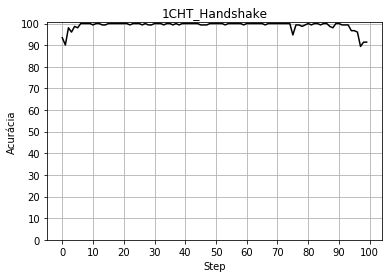

Tempo de Execução:  9.09170937538147
memory peak:  142392
Acc:  0.9956339316835136
Macro-F1:  0.9956578928574675
MCC:  0.9913166476082728
Desvio Padrão:  0.013425077715446047
Numero de atualizações:  15


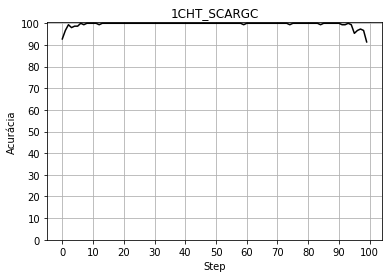

In [8]:
print('Tempo de Execução: ', tempo)
print('memory peak: ', mem)
print('Acc: ', score)
print('Macro-F1: ', f1)
print('MCC: ', mcc)
print('Desvio Padrão: ', std)
print('Numero de atualizações: ', updt)
plots.plotAcc(acc_percent, 100, '1CHT_Handshake')

print('Tempo de Execução: ', tempoS)
print('memory peak: ', memS)
print('Acc: ', scoreS)
print('Macro-F1: ', f1S)
print('MCC: ', mccS)
print('Desvio Padrão: ', stdS)
print('Numero de atualizações: ', updtS)
plots.plotAcc(acc_percentScargc, 100, '1CHT_SCARGC')